Step 1: Set up the Jupyter Notebook

Import Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display plots inside the notebook
%matplotlib inline

Load Dataset

In [2]:
# load the csv file into a DataFrame
df = pd.read_csv('Research_text_files.csv', low_memory=False)

#Show the first 5 rows
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,btb0y11u,22157ea7b67731d48e7a0b4f08741d0d6337d84d,PMC,Implementation of Procedure-Specific Opioid Gu...,10.2106/jbjs.oa.19.00050,PMC7147632,32309760,cc-by-nc-nd,"BACKGROUND: Evidence-based, procedure-specific...",2020-03-03,"Wyles, Cody C.; Hevesi, Mario; Ubl, Daniel S.;...",JB JS Open Access,3.011605e+09,NaN,NaN,document_parses/pdf_json/22157ea7b67731d48e7a0...,document_parses/pmc_json/PMC7147632.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN
1,7t3och3v,NaN,PMC,Development and Clinical Evaluation of a Web-B...,10.2196/17216,PMC7380903,32480361,cc-by,BACKGROUND: Recent advancements in wearable se...,2020-07-09,"Chae, Sang Hoon; Kim, Yushin; Lee, Kyoung-Soub...",JMIR Mhealth Uhealth,3.024384e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7380903.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN
2,h5jfrj2p,02d0ce9f28d04f69024ffbace2a931a05cb44555,PMC,Genetic characterization of the spike gene of ...,10.1002/vms3.256,PMC7397879,32159913,cc-by-nc-nd,BACKGROUND: Porcine epidemic diarrhea (PED) is...,2020-03-11,"Than, Van T.; Choe, Se‐Eun; Vu, Thi T. H.; Do,...",Vet Med Sci,3.010941e+09,NaN,NaN,document_parses/pdf_json/02d0ce9f28d04f69024ff...,document_parses/pmc_json/PMC7397879.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN
3,grzrkff9,NaN,PMC,Dermatological Manifestations in Patients With...,10.7759/cureus.9446,PMC7402433,NaN,cc-by,Severe acute respiratory syndrome coronavirus ...,2020-07-28,"Almutairi, Abdulelah; Alfaleh, Mohammed; Alash...",NaN,3.046186e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7402433.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN
4,jyq76m81,NaN,PMC,COVID-19: Reduced Lung Function and Increased ...,10.6026/97320630016293,PMC7392087,NaN,cc-by,The COVID-19 outbreak causing reduced lung fun...,2020-04-30,"Wu, Dongyuan; Ellis, Dorothy; Datta, Susmita",Bioinformation,3.015175e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7392087.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN


Check Shape of the DataFrame

In [3]:
df.shape

(218052, 19)

218,052 rows and 19 columns

Dsiplay Column Names and Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218052 entries, 0 to 218051
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          218052 non-null  object 
 1   sha               80739 non-null   object 
 2   source_x          218052 non-null  object 
 3   title             217994 non-null  object 
 4   doi               149025 non-null  object 
 5   pmcid             86312 non-null   object 
 6   pubmed_id         127139 non-null  object 
 7   license           218052 non-null  object 
 8   abstract          157011 non-null  object 
 9   publish_time      218034 non-null  object 
 10  authors           211189 non-null  object 
 11  journal           204472 non-null  object 
 12  mag_id            192390 non-null  float64
 13  who_covidence_id  69593 non-null   object 
 14  arxiv_id          2902 non-null    object 
 15  pdf_json_files    80739 non-null   object 
 16  pmc_json_files    62

Check for Missing Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

arxiv_id            215150
pmc_json_files      155197
who_covidence_id    148459
sha                 137313
pdf_json_files      137313
pmcid               131740
pubmed_id            90913
doi                  69027
abstract             61041
url                  48773
s2_id                34989
mag_id               25662
journal              13580
authors               6863
title                   58
publish_time            18
cord_uid                 0
source_x                 0
license                  0
dtype: int64

Part 2: Data Cleaning & Preparation

Convert publish_Time to datetime

In [7]:
# convert 'publish_time' to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# show the first 5 rows to verify the change
df[['publish_time']].head()

,publish_time
0,2020-03-03
1,2020-07-09
2,2020-03-11
3,2020-07-28
4,2020-04-30


Extract Year From Publish Time


In [8]:
# Create a new column 'year' extracted from publish_time
df['year'] = df['publish_time'].dt.year

# check unique values  of year
df['year'].value_counts().sort_index()

year
1955.0        1
1957.0        2
1961.0        1
1962.0        1
1963.0        1
          ...  
2017.0     3614
2018.0     3770
2019.0     4810
2020.0    66674
2021.0        8
Name: count, Length: 62, dtype: int64

Check Missing Values in Key Columns

In [9]:
df[['title', 'abstract', 'authors', 'journal', 'publish_time', 'year']].isnull().sum()

title               58
abstract         61041
authors           6863
journal          13580
publish_time    104153
year            104153
dtype: int64

Remove or Keep Missing Data

To clean the dataset, we remove only rows where title or publish_time is missing 

In [10]:
# create a cleaned version of the dataset
df_clean = df.dropna(subset=['title', 'publish_time']).copy()

# show shape before and after cleaning
print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)

Before cleaning: (218052, 20)
After cleaning: (113850, 20)


This keeps most of the data while removing incomplete rows.

Create a New Feature: Abstract Word Count

In [12]:
# create abstract word count feature
df_clean['abstract_word_count'] = df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))

# show the first 5 rows to verify
df_clean[['abstract', 'abstract_word_count']].head()

# save the cleaned dataset to a new CSV file
df_clean.to_csv('Research_text_files_cleaned.csv', index=False)
print("Cleaned dataset saved to 'Research_text_files_cleaned.csv'")

Cleaned dataset saved to 'Research_text_files_cleaned.csv'


Part 3: Data Analysis & Visualization

Load the Cleaned Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load the cleaned dataset
df_clean = pd.read_csv('Research_text_files_cleaned.csv',)

#show few rows
df_clean.head()

C:\Users\Achuka\AppData\Local\Temp\ipykernel_14656\1378943051.py:6: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('Research_text_files_cleaned.csv',)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year,abstract_word_count
0,btb0y11u,22157ea7b67731d48e7a0b4f08741d0d6337d84d,PMC,Implementation of Procedure-Specific Opioid Gu...,10.2106/jbjs.oa.19.00050,PMC7147632,32309760,cc-by-nc-nd,"BACKGROUND: Evidence-based, procedure-specific...",2020-03-03,...,JB JS Open Access,3.011605e+09,NaN,NaN,document_parses/pdf_json/22157ea7b67731d48e7a0...,document_parses/pmc_json/PMC7147632.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,367
1,7t3och3v,NaN,PMC,Development and Clinical Evaluation of a Web-B...,10.2196/17216,PMC7380903,32480361,cc-by,BACKGROUND: Recent advancements in wearable se...,2020-07-09,...,JMIR Mhealth Uhealth,3.024384e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7380903.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,449
2,h5jfrj2p,02d0ce9f28d04f69024ffbace2a931a05cb44555,PMC,Genetic characterization of the spike gene of ...,10.1002/vms3.256,PMC7397879,32159913,cc-by-nc-nd,BACKGROUND: Porcine epidemic diarrhea (PED) is...,2020-03-11,...,Vet Med Sci,3.010941e+09,NaN,NaN,document_parses/pdf_json/02d0ce9f28d04f69024ff...,document_parses/pmc_json/PMC7397879.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,257
3,grzrkff9,NaN,PMC,Dermatological Manifestations in Patients With...,10.7759/cureus.9446,PMC7402433,NaN,cc-by,Severe acute respiratory syndrome coronavirus ...,2020-07-28,...,NaN,3.046186e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7402433.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,213
4,jyq76m81,NaN,PMC,COVID-19: Reduced Lung Function and Increased ...,10.6026/97320630016293,PMC7392087,NaN,cc-by,The COVID-19 outbreak causing reduced lung fun...,2020-04-30,...,Bioinformation,3.015175e+09,NaN,NaN,NaN,document_parses/pmc_json/PMC7392087.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0,68


Count publication by year

In [18]:
# count paper published each year
year_counts = df_clean['year'].value_counts().sort_index()

# display the counts
year_counts

year
1955.0        1
1957.0        2
1961.0        1
1962.0        1
1963.0        1
          ...  
2017.0     3614
2018.0     3770
2019.0     4810
2020.0    66625
2021.0        8
Name: count, Length: 62, dtype: int64

Visualization

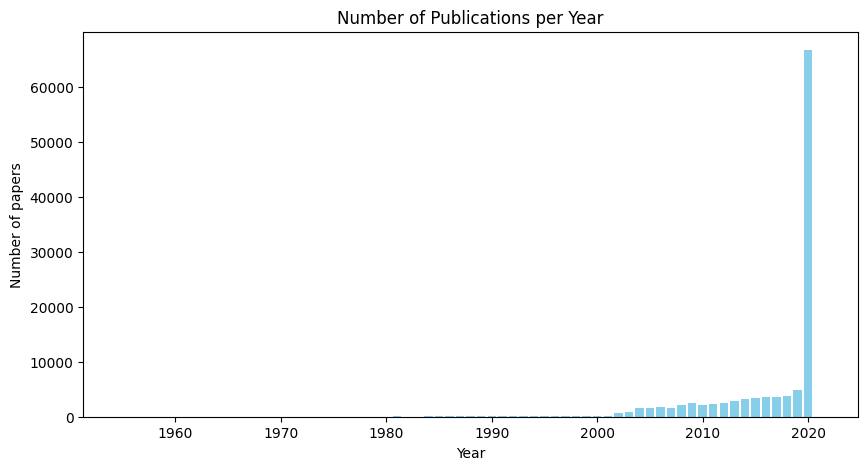

In [15]:
plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.show()

Top journals Publishing COVID-19 Papers

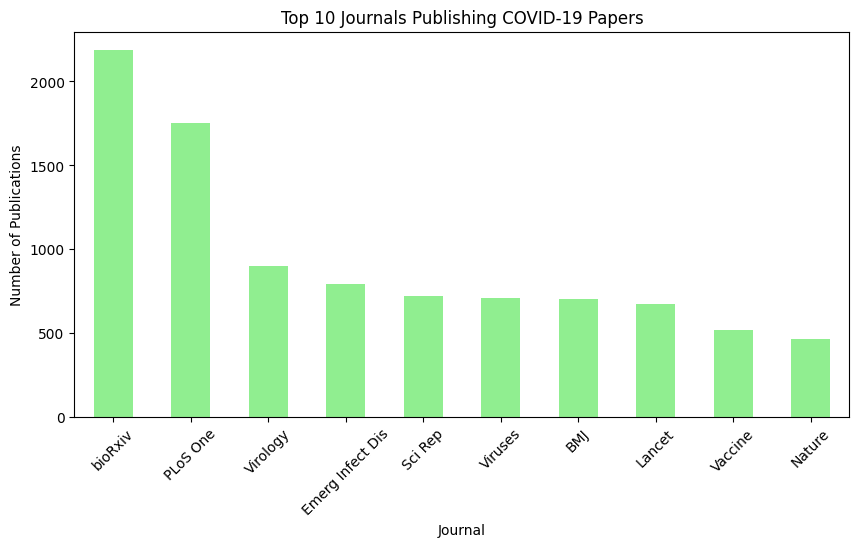

In [17]:
# count journals and show top 10
top_journals = df_clean['journal'].value_counts().head(10)
top_journals
plt.figure(figsize=(10,5))
top_journals.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Journals Publishing COVID-19 Papers')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

Most Frequent Words in Titles

In [20]:
from collections import Counter
import re

# combine all titles into a single string
all_titles = ' '.join(df_clean['title'].dropna()).lower()

# Remove punctuation and split into words
words = re.findall(r'\b[a-zA-Z]{4,}\b', all_titles)

# count most common words
common_words = Counter(words).most_common(20)
common_words

[('covid', 36120),
 ('with', 15245),
 ('sars', 9641),
 ('pandemic', 9456),
 ('coronavirus', 9305),
 ('virus', 8473),
 ('during', 7867),
 ('from', 7863),
 ('patients', 7859),
 ('disease', 7026),
 ('infection', 7010),
 ('respiratory', 6862),
 ('health', 5233),
 ('analysis', 4400),
 ('study', 4378),
 ('viral', 3958),
 ('clinical', 3949),
 ('human', 3880),
 ('acute', 3789),
 ('care', 3681)]

Papers by Source

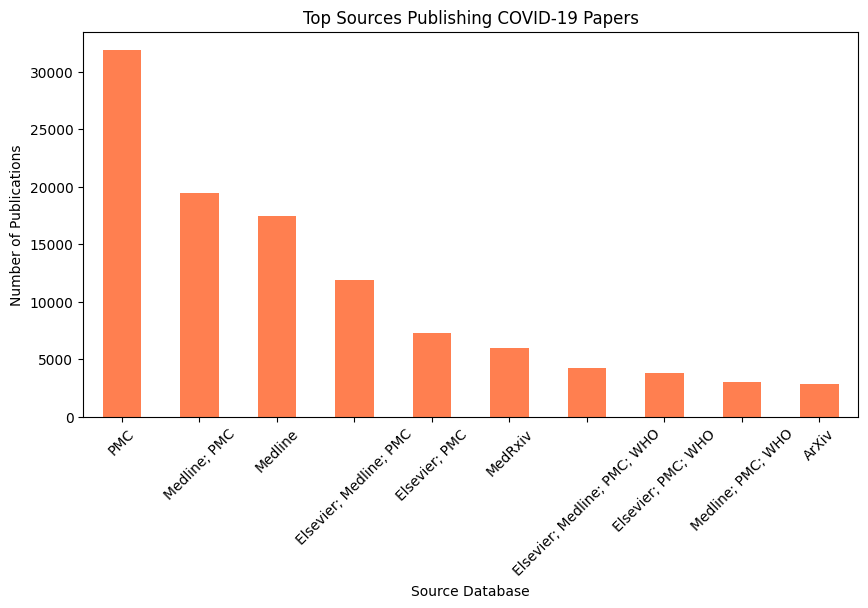

In [21]:
# count papers by source
source_counts = df_clean['source_x'].value_counts()

plt.figure(figsize=(10,5))
source_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top Sources Publishing COVID-19 Papers')
plt.xlabel('Source Database')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45) 
plt.show()

Key Insights

| Analysis                 | Insight Example                                    |
| ------------------------ | -------------------------------------------------- |
| Most published year      | 2020 saw the highest number of publications        |
| Top journals             | Example: *medRxiv, BMJ, The Lancet*                |
| Word frequency in titles | Common words: “COVID-19”, “SARS-CoV-2”, “pandemic” |
| Abstract length          | Average abstract word count calculated             |


Challenges Faced 

| Challenge                     | Solution                                      |
| ----------------------------- | --------------------------------------------- |
| Missing values in title/date  | Dropped those rows                            |
| Different date formats        | Converted using `pd.to_datetime()`            |
| Large dataset loading time    | Used `low_memory=False` & efficient filtering |
| Word cloud requires text prep | Cleaned text: lowercased, removed stopwords   |
